# Radar Simulation 2

## Generating Ambiguity Function of Rectangular Pulse Signals

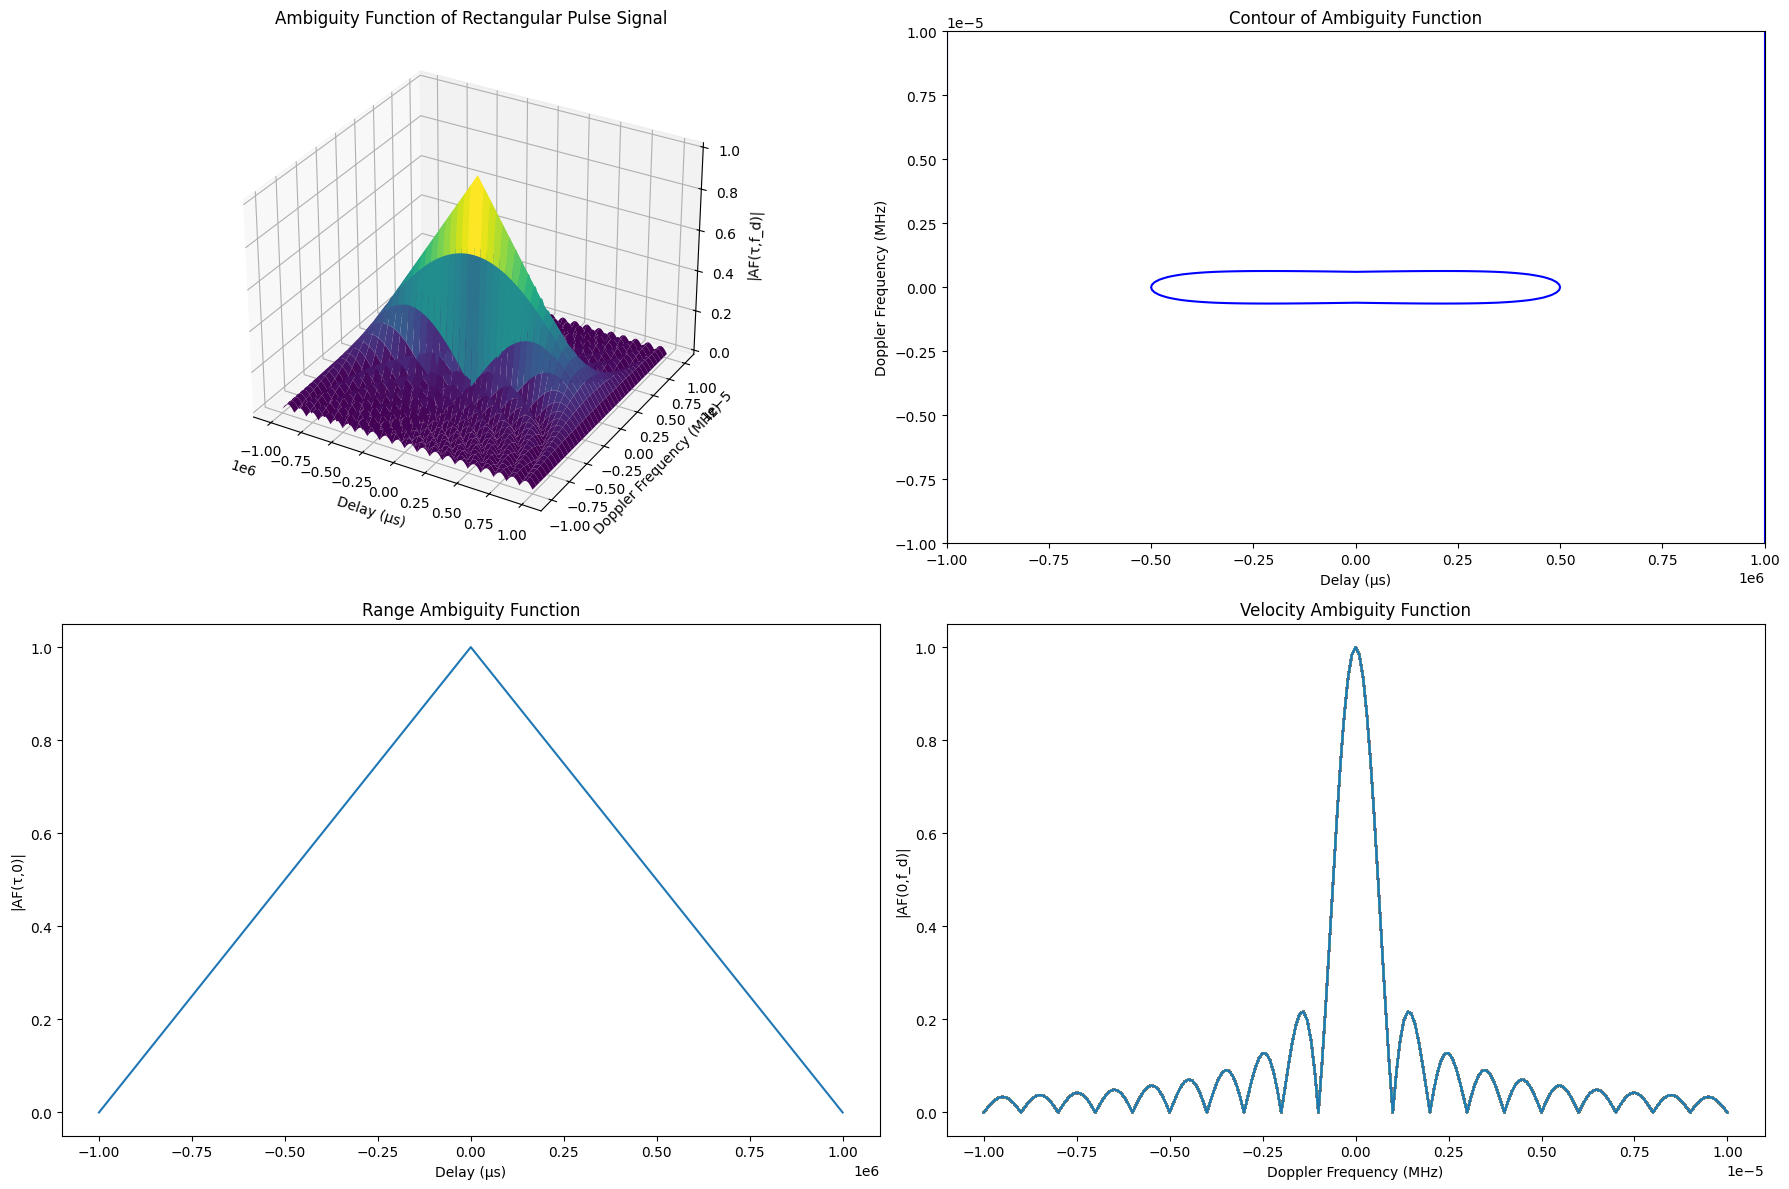

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def af_sp(Te, Grid):
    t = np.linspace(-Te, Te, 2*Grid+1)
    f = np.linspace(-10/Te, 10/Te, 2*Grid+1)
    tau, fd = np.meshgrid(t, f)
    tau1 = (Te - np.abs(tau)) / Te
    mul = np.pi * fd * tau1 * Te
    mul = mul + np.finfo(float).eps
    amf = np.abs(np.sin(mul) / mul * tau1)
    
    # Plotting
    fig = plt.figure(figsize=(18, 12))
    
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.plot_surface(tau*1e6, fd*1e-6, amf, cmap='viridis')
    ax1.set_xlabel('Delay (μs)')
    ax1.set_ylabel('Doppler Frequency (MHz)')
    ax1.set_zlabel('|AF(τ,f_d)|')
    ax1.set_title('Ambiguity Function of Rectangular Pulse Signal')
    
    ax2 = fig.add_subplot(222)
    ax2.contour(tau*1e6, fd*1e-6, amf, 1, colors='b')
    ax2.set_xlabel('Delay (μs)')
    ax2.set_ylabel('Doppler Frequency (MHz)')
    ax2.set_title('Contour of Ambiguity Function')
    
    ax3 = fig.add_subplot(223)
    ax3.plot(t*1e6, tau1[Grid, :])
    ax3.set_xlabel('Delay (μs)')
    ax3.set_ylabel('|AF(τ,0)|')
    ax3.set_title('Range Ambiguity Function')
    
    ff = np.abs(np.sin(mul) / mul)
    ffd = ff[:, Grid]
    ax4 = fig.add_subplot(224)
    ax4.plot(fd*1e-6, ffd)
    ax4.set_xlabel('Doppler Frequency (MHz)')
    ax4.set_ylabel('|AF(0,f_d)|')
    ax4.set_title('Velocity Ambiguity Function')
    
    plt.tight_layout()
    plt.show()

# Example usage
Te = 1
Grid = 100
af_sp(Te, Grid)

## Gaussian Pulse Ambiguity Function Visualization

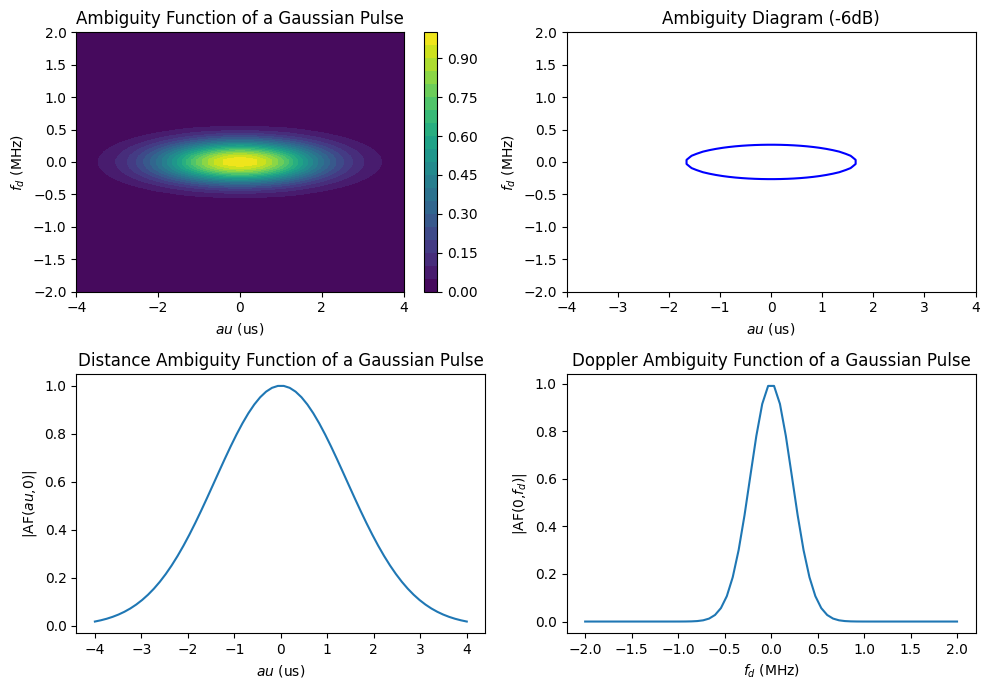

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def af_gauss(sigma, Te, Grid):
    t = np.linspace(-Te, Te, Grid)
    f = np.linspace(-8/Te, 8/Te, Grid)
    tau, fd = np.meshgrid(t, f)
    tau1 = np.exp(-(tau**2 / (4 * sigma**2)))
    mul = np.exp(-(np.pi**2 * sigma**2 * fd**2))
    mul += np.finfo(float).eps  # Avoid division by zero
    amf = tau1 * mul
    return tau, fd, amf

sigma = 1e-6
Te = 4e-6
Grid = 64
tau, fd, amf = af_gauss(sigma, Te, Grid)

# Plotting the ambiguity function of a Gaussian pulse
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.contourf(tau * 1e6, fd * 1e-6, amf, levels=20, cmap='viridis')
plt.colorbar()
plt.title('Ambiguity Function of a Gaussian Pulse')
plt.xlabel('$\tau$ (us)')
plt.ylabel('$f_d$ (MHz)')

# Plotting the ambiguity diagram
plt.subplot(2, 2, 2)
plt.contour(tau * 1e6, fd * 1e-6, amf, levels=[0.5], colors='blue')
plt.title('Ambiguity Diagram (-6dB)')
plt.xlabel('$\tau$ (us)')
plt.ylabel('$f_d$ (MHz)')

# Plotting the distance ambiguity function
plt.subplot(2, 2, 3)
plt.plot(t * 1e6, np.exp(-(t**2 / (4 * sigma**2))))
plt.title('Distance Ambiguity Function of a Gaussian Pulse')
plt.xlabel('$\tau$ (us)')
plt.ylabel('|AF($\tau$,0)|')

# Plotting the Doppler ambiguity function
plt.subplot(2, 2, 4)
plt.plot(f * 1e-6, np.exp(-(np.pi**2 * sigma**2 * f**2)))
plt.title('Doppler Ambiguity Function of a Gaussian Pulse')
plt.xlabel('$f_d$ (MHz)')
plt.ylabel('|AF(0,$f_d$)|')

plt.tight_layout()
plt.show()

## Linear Frequency Modulated (LFM) Signal Ambiguity Function Analysis

C:\Users\24365\AppData\Local\Temp\ipykernel_122884\755281130.py:15: RuntimeWarning: invalid value encountered in divide
  tau1 = np.abs(np.sin(var3) / var3 * var1)


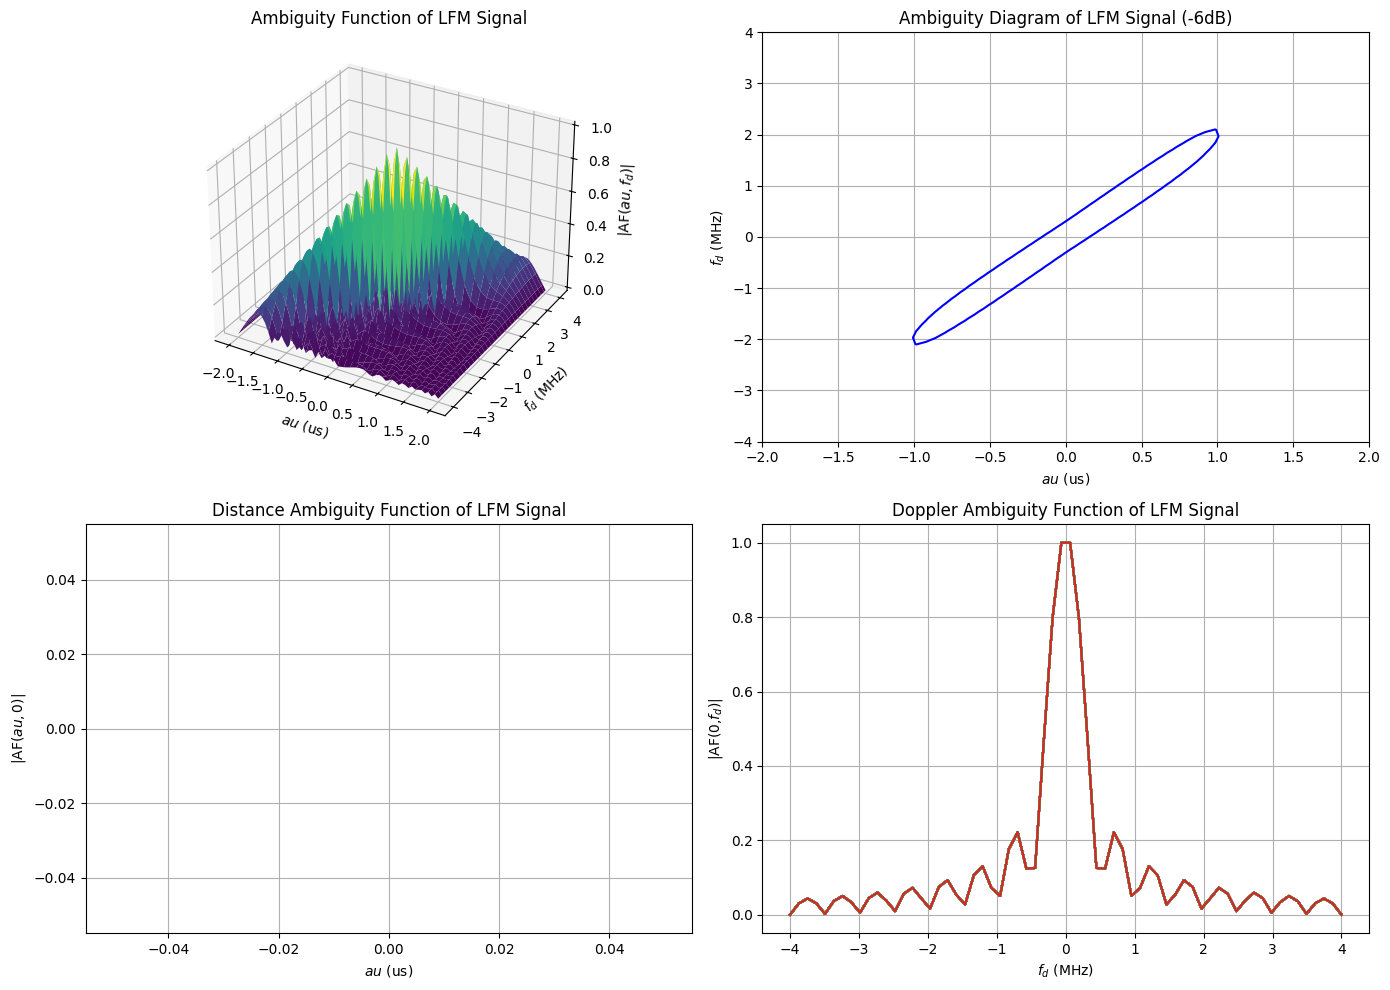

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def af_lfm(B, Te, Grid):
    u = B / Te
    t = np.linspace(-Te, Te, Grid)
    f = np.linspace(-B, B, Grid)
    tau, fd = np.meshgrid(t, f)
    var1 = Te - np.abs(tau)
    var2 = np.pi * (fd - u * tau) * var1
    var2 += np.finfo(float).eps  # Avoid division by zero
    amf = np.abs(np.sin(var2) / var2 * var1 / Te)
    amf /= np.max(amf)  # Normalize
    var3 = np.pi * u * tau * var1
    tau1 = np.abs(np.sin(var3) / var3 * var1)
    tau1 /= np.max(tau1)  # Normalize distance ambiguity
    mul = Te * np.abs(np.sin(np.pi * fd * Te) / (np.pi * fd * Te))
    mul /= np.max(mul)  # Normalize velocity ambiguity
    return tau, fd, amf, tau1, mul

B = 4e6
Te = 2e-6
Grid = 64
tau, fd, amf, tau1, mul = af_lfm(B, Te, Grid)

# Plotting
plt.figure(figsize=(14, 10))

# Ambiguity function surface plot
ax = plt.subplot(221, projection='3d')
ax.plot_surface(tau * 1e6, fd * 1e-6, amf, cmap='viridis')
ax.set_title('Ambiguity Function of LFM Signal')
ax.set_xlabel('$\tau$ (us)')
ax.set_ylabel('$f_d$ (MHz)')
ax.set_zlabel('|AF($\tau,f_d$)|')

# Ambiguity diagram contour plot
plt.subplot(222)
plt.contour(tau * 1e6, fd * 1e-6, amf, levels=[0.5], colors='blue')
plt.title('Ambiguity Diagram of LFM Signal (-6dB)')
plt.xlabel('$\tau$ (us)')
plt.ylabel('$f_d$ (MHz)')
plt.grid(True)

# Distance ambiguity function plot
plt.subplot(223)
plt.plot(t * 1e6, tau1[int(Grid/2), :])
plt.title('Distance Ambiguity Function of LFM Signal')
plt.xlabel('$\tau$ (us)')
plt.ylabel('|AF($\tau,0$)|')
plt.grid(True)

# Doppler ambiguity function plot
plt.subplot(224)
plt.plot(fd * 1e-6, mul[:, int(Grid/2)])
plt.title('Doppler Ambiguity Function of LFM Signal')
plt.xlabel('$f_d$ (MHz)')
plt.ylabel('|AF(0,$f_d$)|')
plt.grid(True)

plt.tight_layout()
plt.show()

## Barker Code Ambiguity Function Visualization

C:\Users\24365\AppData\Local\Temp\ipykernel_122884\2054418272.py:87: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()


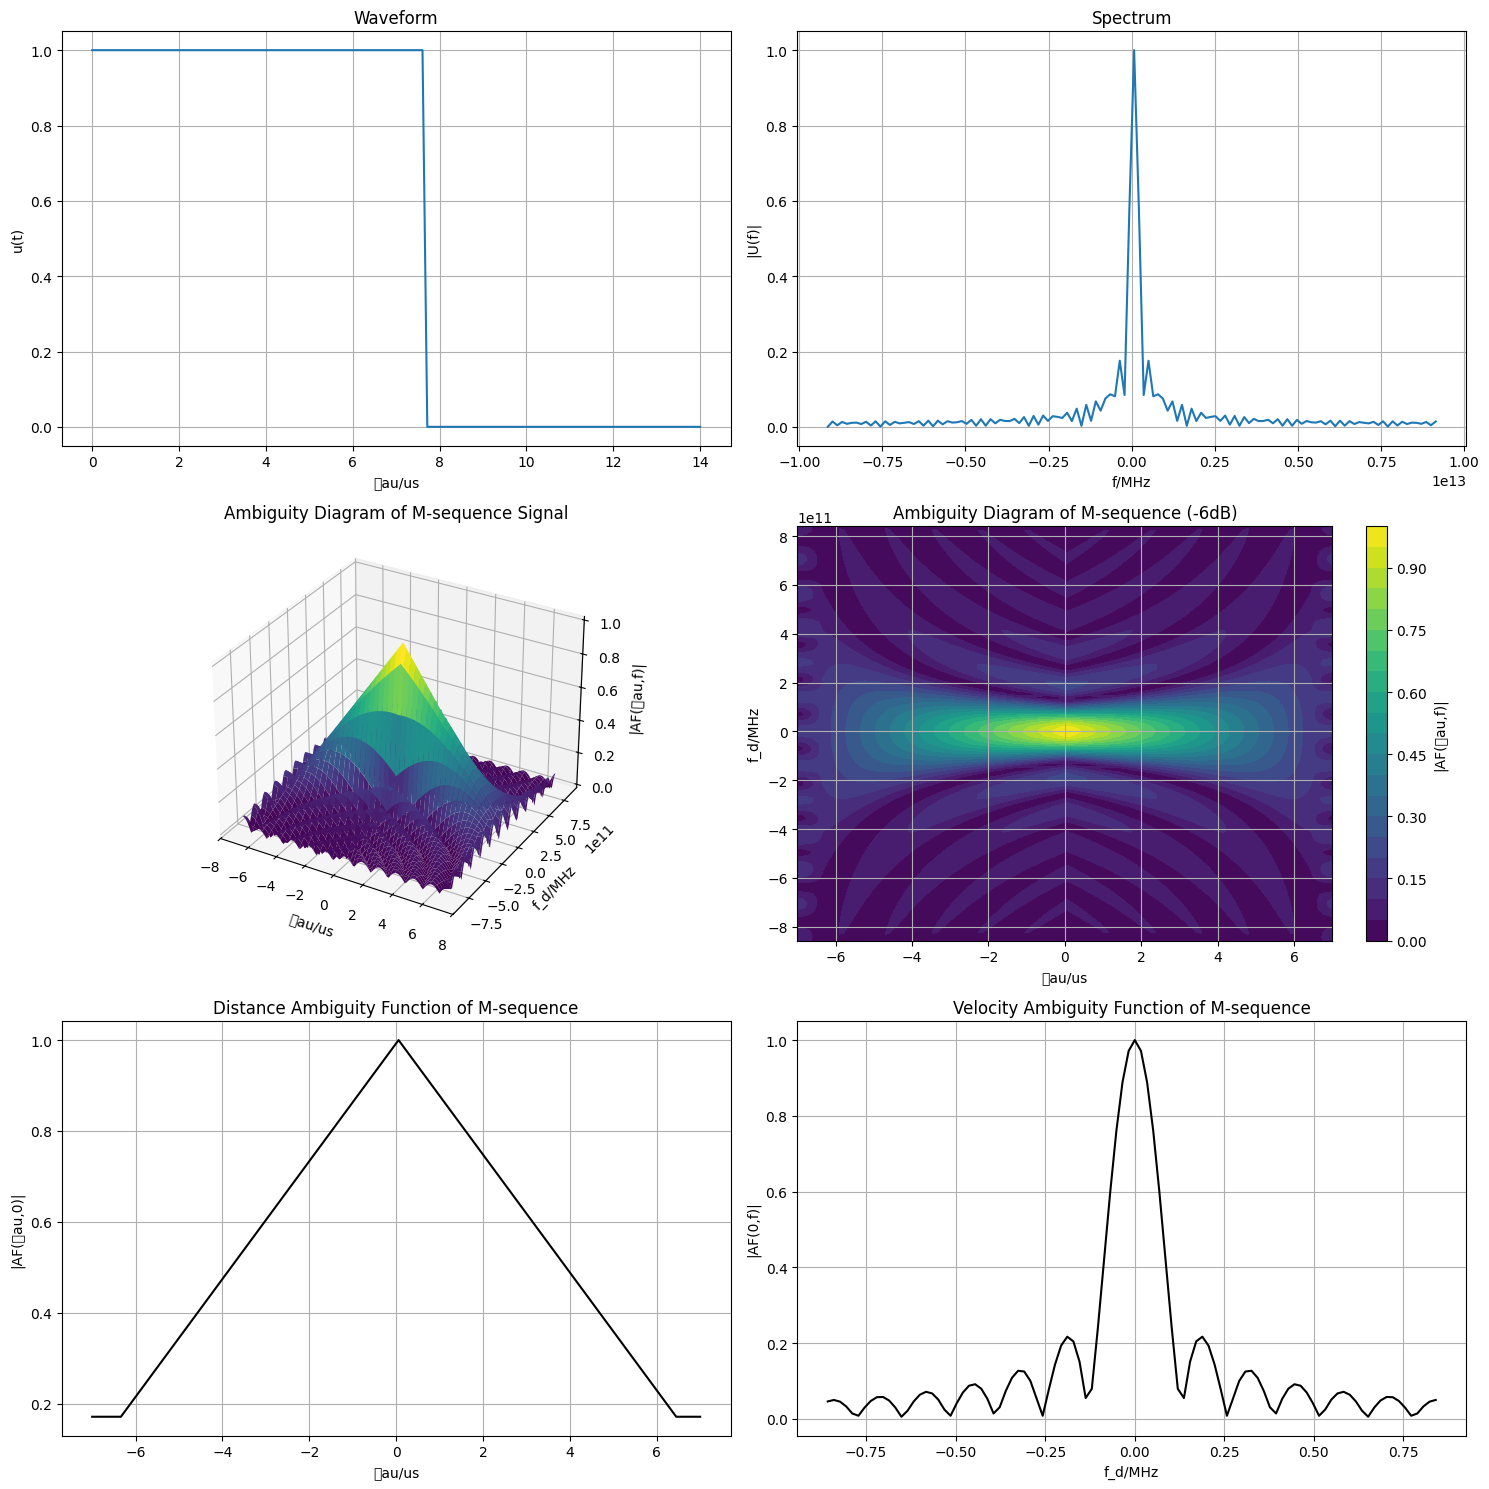

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def af_barker(Barker_code, T):
    N = len(Barker_code)
    tau = N * T
    samp_num = len(Barker_code) * 10
    n = int(np.ceil(np.log2(samp_num)))
    nfft = 2 ** n
    u = np.zeros(nfft)
    u[:samp_num] = np.kron(Barker_code, np.ones(10))
    delay = np.linspace(-tau, tau, nfft)
    
    plt.figure(figsize=(15, 15))
    
    # Waveform Plot
    ax1 = plt.subplot(321)
    ax1.plot(delay * 1e6 + N, u)
    ax1.set_xlabel('\tau/us')
    ax1.set_ylabel('u(t)')
    ax1.set_title('Waveform')
    ax1.grid(True)
    
    # Spectrum Plot
    ax2 = plt.subplot(322)
    sampling_interval = tau / nfft
    freqlimit = 0.5 / sampling_interval
    f = np.linspace(-freqlimit, freqlimit, nfft)
    freq = np.fft.fft(u, nfft)
    vfft = freq
    freq = np.abs(freq) / np.max(np.abs(freq))
    ax2.plot(f * 1e6, np.fft.fftshift(freq))
    ax2.set_xlabel('f/MHz')
    ax2.set_ylabel('|U(f)|')
    ax2.set_title('Spectrum')
    ax2.grid(True)
    
    freq_del = 12 / tau / 100
    freq1 = np.arange(-6 / tau, 6 / tau, freq_del)
    amf = np.zeros((len(freq1), nfft))
    
    for k in range(len(freq1)):
        sp = u * np.exp(1j * 2 * np.pi * freq1[k] * delay)
        ufft = np.fft.fft(sp, nfft)
        prod = ufft * np.conj(vfft)
        amf[k, :] = np.fft.fftshift(np.abs(np.fft.ifft(prod)))
        
    amf /= np.max(amf)
    m, n = np.where(amf == 1.0)
    
    # Mesh plot
    ax3 = plt.subplot(323, projection='3d')
    X, Y = np.meshgrid(delay * 1e6, freq1 * 1e6)
    ax3.plot_surface(X, Y, amf, cmap='viridis')
    ax3.set_xlabel('\tau/us')
    ax3.set_ylabel('f_d/MHz')
    ax3.set_zlabel('|AF(\tau,f)|')
    ax3.set_title('Ambiguity Diagram of M-sequence Signal')

    # Contour plot
    ax4 = plt.subplot(324)
    CS = ax4.contourf(delay * 1e6, freq1 * 1e6, amf, levels=20, cmap='viridis')
    cbar = plt.colorbar(CS, ax=ax4)
    cbar.set_label('|AF(\tau,f)|')
    ax4.set_xlabel('\tau/us')
    ax4.set_ylabel('f_d/MHz')
    ax4.set_title('Ambiguity Diagram of M-sequence (-6dB)')
    ax4.grid(True)
    
    # Distance Ambiguity Function
    ax5 = plt.subplot(325)
    ax5.plot(delay * 1e6, amf[m[0], :], 'k')  # m[0] to handle multiple results
    ax5.set_xlabel('\tau/us')
    ax5.set_ylabel('|AF(\tau,0)|')
    ax5.set_title('Distance Ambiguity Function of M-sequence')
    ax5.grid(True)
    
    # Velocity Ambiguity Function
    ax6 = plt.subplot(326)
    ax6.plot(freq1 * 1e-6, amf[:, n[0]], 'k')  # n[0] to handle multiple results
    ax6.set_xlabel('f_d/MHz')
    ax6.set_ylabel('|AF(0,f)|')
    ax6.set_title('Velocity Ambiguity Function of M-sequence')
    ax6.grid(True)
    
    plt.tight_layout()
    plt.show()

# Generate PRBS and Barker Code
code = (2**7 - 1)  # Simplified method to generate PRBS
code = np.array([int(i) for i in np.binary_repr(code)])
code = code * 2 - 1  # Convert to bipolar (-1, 1)
Barker_code = np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
T = 1e-6

# Calculate the Ambiguity Function
af_barker(code, T)

## Linear Frequency Modulation (LFM) Pulse Compression and Matched Filtering

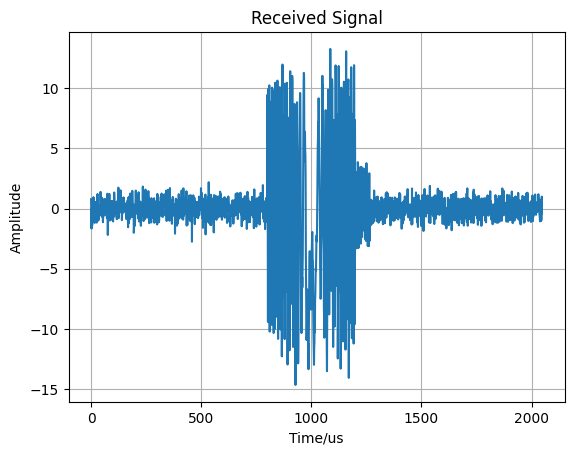

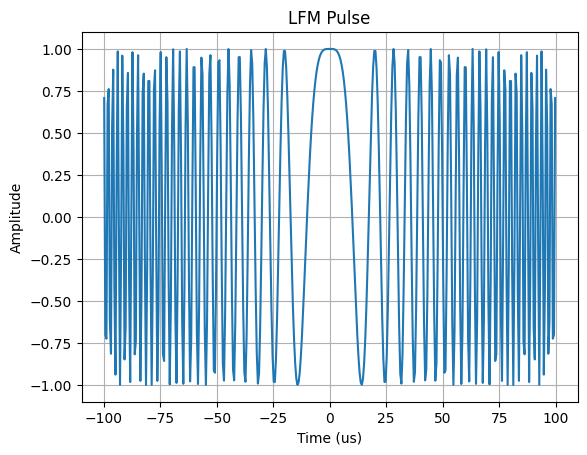

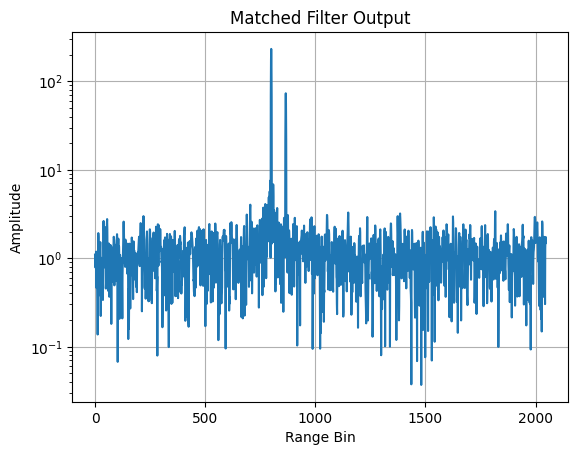

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import taylor
from scipy.fft import fft, ifft

def LFM_comp(Te, Bm, Ts, R0, Vr, SNR, Rmin, Rrec, Window, bos):
    mu = Bm / Te  # modulation factor
    c = 3e8
    M = round(Te / Ts)
    t1 = np.linspace(-Te/2 + Ts/2, Te/2 - Ts/2, M)  # Adjusted time vector
    NR0 = np.ceil(np.log2(2 * Rrec / c / Ts))
    NR1 = int(2**NR0)
    lfm = np.exp(1j * np.pi * mu * t1**2)
    W_t = lfm * Window  # Ensure W_t computation has matching dimensions
    game = (1 + 2 * np.array(Vr) / c)**2
    sp = 0.707 * (np.random.randn(NR1) + 1j * np.random.randn(NR1))  # noise
    for k in range(len(R0)):
        NR = int(2 * (R0[k] - Rmin) / c / Ts)
        spt = (10**(SNR[k]/20)) * np.exp(-1j * bos * R0[k]) * np.exp(1j * np.pi * mu * game[k] * t1**2)
        sp[NR:NR+M] += spt  # signal + noise
    spf = fft(sp, NR1)
    Wf_t = fft(W_t, NR1)
    y = np.abs(ifft(spf * np.conj(Wf_t), NR1) / NR0)  # /(NR1/2)
    
    # Plotting
    plt.figure()
    plt.plot(np.real(sp))
    plt.xlabel('Time/us')
    plt.ylabel('Amplitude')
    plt.title('Received Signal')
    plt.grid(True)
    
    plt.figure()
    plt.plot(t1 * 1e6, np.real(lfm))
    plt.xlabel('Time (us)')
    plt.ylabel('Amplitude')
    plt.title('LFM Pulse')
    plt.grid(True)
    
    plt.figure()
    plt.semilogy(np.real(y))
    plt.xlabel('Range Bin')
    plt.ylabel('Amplitude')
    plt.title('Matched Filter Output')
    plt.grid(True)
    
    return y

# Parameters
Te = 200e-6
Bm = 1e6
Ts = 0.5e-6
R0 = [80e3, 85e3]
Vr = [0, 0]
SNR = [20, 10]
Rmin = 20e3
Rrec = 150e3
M = round(Te/Ts)
Window = taylor(M, 4)  # Assuming 4 sidelobes as an example
bos = 2*np.pi/0.03

# Call the function
y = LFM_comp(Te, Bm, Ts, R0, Vr, SNR, Rmin, Rrec, Window, bos)

## PCM Signal Compression and Encoding in Python

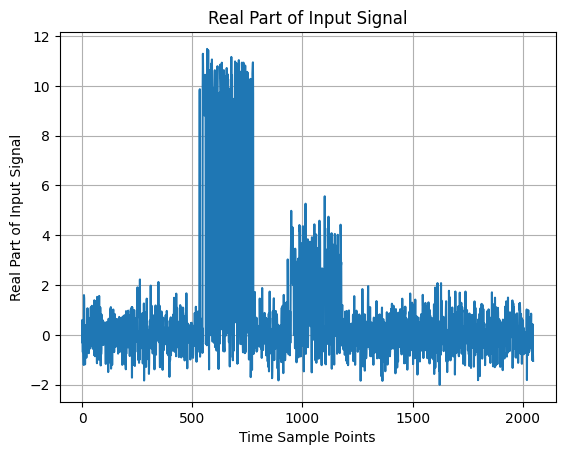

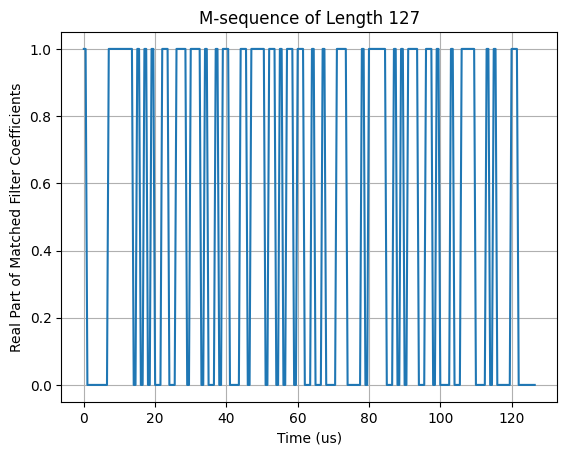

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

def PCM_comp(Te, code, Ts, R0, Vr, SNR, Rmin, Rrec, bos):
    M = round(Te / Ts)
    code2 = np.repeat(code, M)  # Repeat each element of code M times
    c = 3e8  # Speed of light in m/s
    NR0 = np.ceil(np.log2(2 * Rrec / c / Ts))
    NR1 = int(2 ** NR0)
    M2 = M * len(code)
    t1 = np.arange(M2) * Ts  # Time vector
    sp = 0.707 * (np.random.randn(NR1) + 1j * np.random.randn(NR1))  # Noise
    for k in range(len(R0)):
        NR = int(2 * (R0[k] - Rmin) / c / Ts)
        Ri = 2 * (R0[k] - Vr[k] * t1)
        spt = (10 ** (SNR[k] / 20)) * np.exp(-1j * bos * Ri) * code2  # Signal
        sp[NR:NR + M2] += spt  # Signal + noise
    spf = fft(sp, NR1)
    Wf_t = fft(code2, NR1)  # FFT of the code
    y = np.abs(ifft(spf * np.conj(Wf_t), NR1)) / NR0  # Matched filter output
    
    # Plotting
    plt.figure()
    plt.plot(np.real(sp))
    plt.xlabel('Time Sample Points')
    plt.ylabel('Real Part of Input Signal')
    plt.title('Real Part of Input Signal')
    plt.grid(True)
    
    plt.figure()
    plt.plot(t1 * 1e6, np.real(code2))
    plt.xlabel('Time (us)')
    plt.ylabel('Real Part of Matched Filter Coefficients')
    plt.title('M-sequence of Length 127')
    plt.grid(True)
    
    return y

# Define parameters
Te = 1e-6
Ts = 0.5e-6
R0 = [60e3, 90e3]  # Initial ranges in meters
Vr = [0, 0]  # Radial velocities in m/s
SNR = [20, 10]  # Signal-to-noise ratios in dB
Rmin = 20e3  # Minimum range in meters
Rrec = 150e3  # Maximum receivable range in meters
M = round(Te / Ts)  # Number of samples
bos = 2 * np.pi / 0.03  # Baseband oscillation frequency

# Binary code sequence
code = np.array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
                 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
                 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
                 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

# Call the PCM_comp function
y = PCM_comp(Te, code, Ts, R0, Vr, SNR, Rmin, Rrec, bos)

## Stretch Processing of LFM Signals for Target Detection

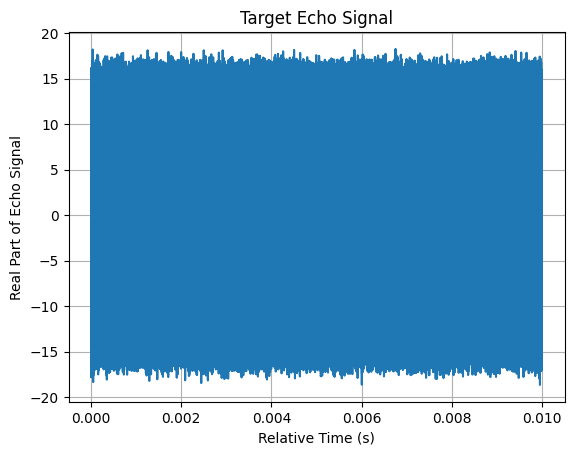

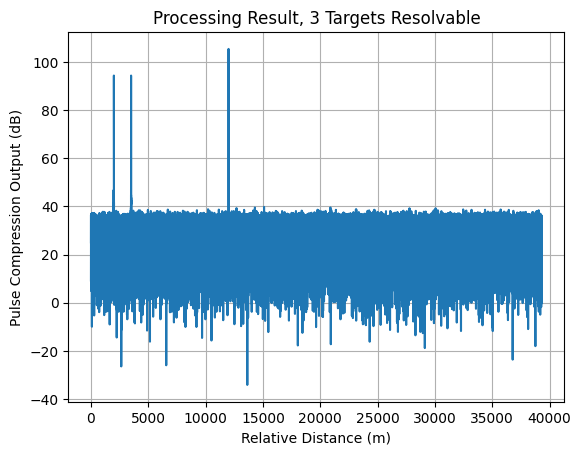

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.signal.windows import kaiser

def stretch_lfm(f0, Te, Bm, Rmin, Rrec, R0, Vr, SNR):
    mu = Bm / Te  # Modulation factor
    c = 3e8  # Speed of light in m/s
    dltR = c / (2 * Bm)  # Range resolution
    Trec = 2 * Rrec * 1e3 / c  # Receivable time, converted Rrec from km to m
    N = int(2 * Bm * Trec)  # Number of samples
    m = np.ceil(np.log2(N))
    Nfft = int(2 ** m)  # FFT size
    Ts = Te / Nfft
    t1 = np.arange(Nfft) * Ts  # Time vector
    Window = kaiser(Nfft, np.pi)  # Kaiser window
    sp = 0.707 * (np.random.randn(Nfft) + 1j * np.random.randn(Nfft))  # Noise
    for k in range(len(R0)):
        R0[k] *= 1e3  # Convert R0 from km to meters
        tao = 2 * (R0[k] - Rmin - Vr[k] * t1) / c  # Time delay
        spt = (10 ** (SNR[k] / 20)) * np.exp(1j * (2 * np.pi * mu * tao * t1 + (2 * np.pi * f0 - np.pi * mu * tao) * tao))
        sp += spt  # Signal + noise
    y = np.abs(fft(sp * Window, Nfft)) / m

    # Plotting
    plt.figure()
    plt.plot(t1, np.real(sp))
    plt.xlabel('Relative Time (s)')
    plt.ylabel('Real Part of Echo Signal')
    plt.title('Target Echo Signal')
    plt.grid(True)

    plt.figure()
    plt.plot(np.arange(Nfft//2) * dltR, 20 * np.log10(y[:Nfft//2]))
    plt.xlabel('Relative Distance (m)')
    plt.ylabel('Pulse Compression Output (dB)')
    plt.title('Processing Result, 3 Targets Resolvable')
    plt.grid(True)

    return y, sp

# Define parameters
Te = 10e-3  # Pulse duration in seconds
Bm = 1e9  # Bandwidth in Hz
R0 = [5, 6.5, 15]  # Initial target ranges in km
Vr = [0, 0, 0]  # Target radial velocities in m/s (stationary targets)
SNR = [10, 10, 20]  # Signal-to-noise ratio in dB for each target
Rmin = 3e3  # Minimum range in meters
Rrec = 30  # Maximum receivable range in km
f0 = 5.6e9  # Carrier frequency in Hz

# Call the function
y, sp = stretch_lfm(f0, Te, Bm, Rmin, Rrec, R0, Vr, SNR)

## Marcum Q-Function Based Radar Detection Probability Analysis

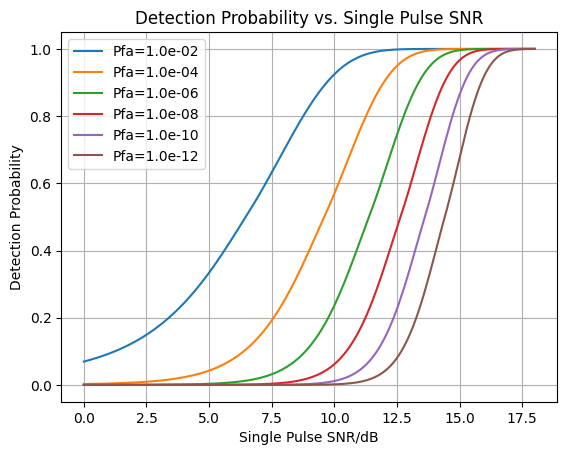

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def marcumsq(a, b):
    max_test_value = 1000
    if a < b:
        alphan0 = 1.0
        dn = a / b
    else:
        alphan0 = 0.0
        dn = b / a
    betan0 = 0.5
    D1 = dn
    n = 0
    ratio = 2.0 / (a * b)
    alphan = 0.0
    betan = 0.0
    while betan < max_test_value:
        n += 1
        alphan = dn + ratio * n * alphan0 + alphan
        betan = 1.0 + ratio * n * betan0 + betan
        alphan0 = alphan
        betan0 = betan
        dn = dn * D1
    PD = (alphan0 / (2.0 * betan0)) * np.exp(-((a - b) ** 2) / 2.0)
    if a >= b:
        PD = 1.0 - PD
    return PD

# Define SNR range and Pfa values
SNR = np.arange(0, 18.1, 0.1)
Pfa = 10 ** np.linspace(-2, -12, 6)  # Properly use linspace for even spacing

# Preallocate p for speed
p = np.zeros((len(SNR), len(Pfa)))

# Calculate detection probability for each SNR and Pfa
for n in range(len(Pfa)):
    y = np.sqrt(-2.0 * np.log(Pfa[n]))
    for k in range(len(SNR)):
        x = np.sqrt(2.0 * 10**(0.1 * SNR[k]))
        p[k, n] = marcumsq(x, y)

# Plot the results
plt.figure()
for i in range(len(Pfa)):
    plt.plot(SNR, p[:, i], label=f'Pfa={Pfa[i]:.1e}')
plt.xlabel('Single Pulse SNR/dB')
plt.ylabel('Detection Probability')
plt.title('Detection Probability vs. Single Pulse SNR')
plt.legend()
plt.grid(True)
plt.show()

## Optimal Detection Characteristics for Signals with Rayleigh Fading

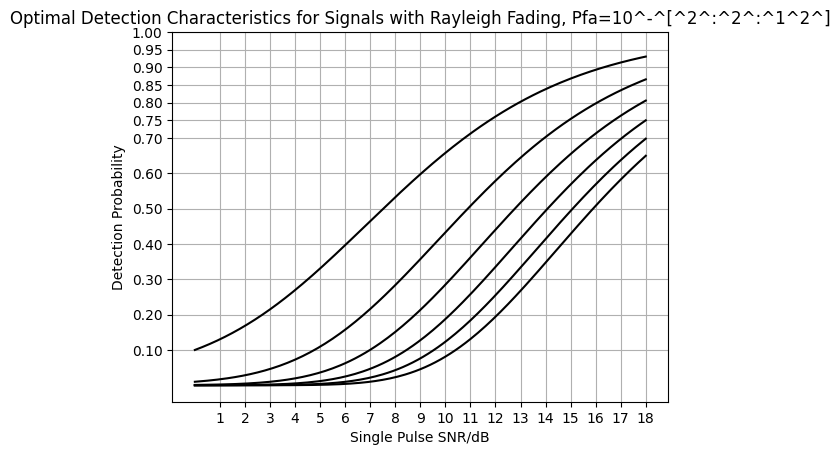

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define false alarm probabilities and Single pulse SNR in dB
n = np.arange(2, 13, 2, dtype=float)  # False alarm probabilities as floats
s = np.arange(0, 18.1, 0.1)  # Single pulse SNR in dB
y = 10 ** (-n)  # Convert false alarm probabilities to linear scale
x = 10 ** (0.1 * s)  # Convert SNR from dB to linear scale
x = 1 / (1 + x)  # Calculate the inverse

# Calculate detection probability
p = np.exp(np.outer(np.log(y), x))

# Plotting detection probability vs. SNR
plt.figure()
for idx in range(p.shape[0]):
    plt.plot(s, p[idx, :], 'k')  # 'k' for black lines

plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.9999])
plt.xticks(np.arange(1, 19, 1))
plt.xlabel('Single Pulse SNR/dB')
plt.ylabel('Detection Probability')
plt.title('Optimal Detection Characteristics for Signals with Rayleigh Fading, Pfa=10^-^[^2^:^2^:^1^2^]')
plt.grid(True)
plt.show()